# Yearly model

In [1]:
import torch
from torch import autograd, nn, optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Pre-process data

In [3]:
# data = pd.read_csv('data.csv',sep=";")
# data = pd.read_csv('data(NCG).csv',sep=";")
# data = data.append(pd.read_csv('data.csv',sep=";")) 
# data = data.append(pd.read_csv('data(PEG).csv',sep=";")) 
# data = data.append(pd.read_csv('data.csv',sep=";")) 
# data = data.append(pd.read_csv('data(VTP).csv',sep=";")) 
# data = data.append(pd.read_csv('data.csv',sep=";")) 
# data = data.append(pd.read_csv('data(ZEE).csv',sep=";")) 
# data = data.append(pd.read_csv('data.csv',sep=";")) 
# # data = data.append(pd.read_csv('data(PSV).csv',sep=";"))               
# data = data.append(pd.read_csv('data.csv',sep=";")) 

# data = pd.read_csv('data(NCG).csv',sep=";")
# data = pd.read_csv('data(PEG).csv',sep=";")
# data = pd.read_csv('data(VTP).csv',sep=";") 
# data = pd.read_csv('data(ZEE).csv',sep=";") 
# data = pd.read_csv('data(PSV).csv',sep=";")               
data = pd.read_csv('data.csv',sep=";") 
data = data.dropna()
# display(data)
# print(data['% FULL'].mean())

# scaler1 = MinMaxScaler(feature_range=(-1, 1))
# data['% FULL']=scaler1.fit_transform(data['% FULL'].values.reshape(-1, 1))
# scaler2 = MinMaxScaler(feature_range=(-1, 1))
# data['Brent (eur/bbl)']=scaler2.fit_transform(data['Brent (eur/bbl)'].values.reshape(-1, 1))
# scaler3 = MinMaxScaler(feature_range=(-1, 1))
# data['Coal (eur/t)']=scaler3.fit_transform(data['Coal (eur/t)'].values.reshape(-1, 1))
# scaler4 = MinMaxScaler(feature_range=(-1, 1))
# data['CO2 (eur/t)']=scaler4.fit_transform(data['CO2 (eur/t)'].values.reshape(-1, 1))
# scaler5 = MinMaxScaler(feature_range=(-1, 1))
# data['month']=scaler5.fit_transform(data['month'].values.reshape(-1, 1))
# scaler6 = MinMaxScaler(feature_range=(-1, 1))
# data['JKM (Eur/mmbtu)']=scaler6.fit_transform(data['JKM (Eur/mmbtu)'].values.reshape(-1, 1))
# scaler7 = MinMaxScaler(feature_range=(-1, 1))
# data['Endex (eur/Mwh)']=scaler7.fit_transform(data['Endex (eur/Mwh)'].values.reshape(-1, 1))
# scaler8 = MinMaxScaler(feature_range=(-1, 1))
# data['AVG_TEMP']=scaler8.fit_transform(data['AVG_TEMP'].values.reshape(-1, 1))
scaler = MinMaxScaler(feature_range=(-1, 1))
data[['% FULL','Brent (eur/bbl)','Coal (eur/t)','CO2 (eur/t)','month','JKM (Eur/mmbtu)','Endex (eur/Mwh)','AVG_TEMP']] = scaler.fit_transform(data[['% FULL','Brent (eur/bbl)','Coal (eur/t)','CO2 (eur/t)','month','JKM (Eur/mmbtu)','Endex (eur/Mwh)','AVG_TEMP']])

data_train = data.iloc[:int(data.shape[0]*0.9)]
data_test = data.iloc[int(1+data.shape[0]*0.9):int(data.shape[0]*0.95)]
data_validate = data.iloc[int(1+data.shape[0]*0.95):]
display(data_train)
data_train = shuffle(data_train)

X_train= torch.Tensor(data_train[['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)','AVG_TEMP']].astype(np.float32).values)
# X_train= torch.Tensor(data_train[['% FULL','Brent (eur/bbl)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)']].astype(np.float32).values)
y_train= torch.tensor(data_train['TTF (eur/Mwh)'].astype(np.float32).values)

X_test= torch.Tensor(data_test[['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)','AVG_TEMP']].astype(np.float32).values)
# X_test= torch.Tensor(data_test[['% FULL','Brent (eur/bbl)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)']].astype(np.float32).values)
y_test= torch.tensor(data_test['TTF (eur/Mwh)'].astype(np.float32).values)

X_validate= torch.Tensor(data_validate[['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)','AVG_TEMP']].astype(np.float32).values)
# X_validate= torch.Tensor(data_validate[['% FULL','Brent (eur/bbl)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)']].astype(np.float32).values)
y_validate= torch.tensor(data_validate['TTF (eur/Mwh)'].astype(np.float32).values)


,date,month,% FULL,Brent (eur/bbl),JKM (Eur/mmbtu),Coal (eur/t),CO2 (eur/t),Endex (eur/Mwh),AVG_TEMP,TTF (eur/Mwh)
0,4/01/2016,-1.000000,0.382453,-0.646412,-0.145412,-0.874372,-0.654026,-0.590147,-0.344262,14.68
1,5/01/2016,-1.000000,0.366899,-0.665730,-0.140441,-0.889447,-0.658287,-0.588491,-0.442623,14.70
2,6/01/2016,-1.000000,0.352708,-0.751741,-0.151809,-0.862647,-0.679591,-0.583523,-0.540984,15.18
3,7/01/2016,-1.000000,0.337700,-0.787722,-0.187518,-0.842546,-0.696634,-0.558270,-0.737705,15.38
4,8/01/2016,-1.000000,0.324328,-0.794534,-0.186657,-0.889447,-0.707712,-0.596771,-0.540984,14.57
5,11/01/2016,-1.000000,0.293219,-0.860836,-0.174514,-0.902848,-0.732424,-0.606707,-0.114754,14.48
6,12/01/2016,-1.000000,0.282030,-0.885936,-0.179240,-0.926298,-0.734129,-0.649762,-0.245902,14.05
7,13/01/2016,-1.000000,0.269205,-0.908342,-0.186736,-0.943049,-0.722199,-0.652660,-0.081967,14.25
8,14/01/2016,-1.000000,0.253377,-0.880680,-0.189371,-0.948074,-0.735833,-0.676671,-0.180328,13.82
9,19/01/2016,-1.000000,0.159503,-0.968968,-0.541956,-0.966499,-0.758841,-0.742910,-0.639344,13.70


# Neural network

In [4]:
dropout = 0.2
class Net(nn.Module):
    
    def __init__(self,input_size, hidden1_size, hidden2_size,hidden3_size, hidden4_size, hidden5_size, hidden6_size, hidden7_size,hidden8_size, hidden9_size, hidden10_size,hidden11_size,hidden12_size,hidden13_size, hidden14_size, hidden15_size, hidden16_size, hidden17_size,hidden18_size, hidden19_size, hidden20_size,num_classes): 
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
#         self.fc1 = nn.DataParallel(self.fc1)
        self.drop1 = nn.Dropout(p=dropout)
#         self.drop2 = nn.Dropout3d(p=dropout)
        self.bn1 = nn.BatchNorm1d(hidden1_size)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
#         self.fc2 = nn.DataParallel(self.fc2)
        self.drop2 = nn.Dropout(p=dropout)
        self.bn2 = nn.BatchNorm1d(hidden2_size)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden2_size, hidden3_size)
#         self.fc3 = nn.DataParallel(self.fc3)
        self.drop3 = nn.Dropout(p=dropout)
#         self.bn3 = nn.BatchNorm1d(hidden3_size)
        self.relu3 = nn.ReLU()
        
        self.fc4 = nn.Linear(hidden3_size, hidden4_size)  
#         self.fc4 = nn.DataParallel(self.fc4)
        self.drop4 = nn.Dropout(p=dropout)
#         self.bn4 = nn.BatchNorm1d(hidden4_size)
        self.relu4 = nn.ReLU()
        
        self.fc5 = nn.Linear(hidden4_size, hidden5_size)  
#         self.fc5 = nn.DataParallel(self.fc5)
        self.drop5 = nn.Dropout(p=dropout)
#         self.bn5 = nn.BatchNorm1d(hidden5_size)
        self.relu5 = nn.ReLU()
        
        self.fc6 = nn.Linear(hidden5_size, hidden6_size)
#         self.fc6 = nn.DataParallel(self.fc6)
        self.drop6 = nn.Dropout(p=dropout)
#         self.bn6 = nn.BatchNorm1d(hidden6_size)
        self.relu6 = nn.ReLU()
        
        self.fc7 = nn.Linear(hidden6_size, hidden7_size)
#         self.fc7 = nn.DataParallel(self.fc7)
        self.drop7 = nn.Dropout(p=dropout)
#         self.bn7 = nn.BatchNorm1d(hidden2_size)
        self.relu7 = nn.ReLU()
        
        self.fc8 = nn.Linear(hidden7_size, hidden8_size)
#         self.fc8 = nn.DataParallel(self.fc8)
        self.drop8 = nn.Dropout(p=dropout)
#         self.bn8 = nn.BatchNorm1d(hidden8_size)
        self.relu8 = nn.ReLU()
        
        self.fc9 = nn.Linear(hidden8_size, hidden9_size) 
#         self.fc9 = nn.DataParallel(self.fc9)
        self.drop9 = nn.Dropout(p=dropout)
#         self.bn9 = nn.BatchNorm1d(hidden9_size)
        self.relu9 = nn.ReLU()
        
        self.fc10 = nn.Linear(hidden9_size, hidden10_size) 
#         self.fc10 = nn.DataParallel(self.fc10)
        self.drop10 = nn.Dropout(p=dropout)
#         self.bn10 = nn.BatchNorm1d(hidden10_size)
        self.relu10 = nn.ReLU()
        
        self.fc11 = nn.Linear(hidden10_size, hidden11_size)  
#         self.fc11 = nn.DataParallel(self.fc11)
        self.drop11 = nn.Dropout(p=dropout)
#         self.bn11 = nn.BatchNorm1d(hidden11_size)
        self.relu11 = nn.ReLU()
    
        self.fc12 = nn.Linear(hidden11_size, hidden12_size)
#         self.fc2 = nn.DataParallel(self.fc2)
        self.drop12 = nn.Dropout(p=dropout)
#         self.bn2 = nn.BatchNorm1d(hidden2_size)
        self.relu12 = nn.ReLU()
        
        self.fc13 = nn.Linear(hidden12_size, hidden13_size)
#         self.fc3 = nn.DataParallel(self.fc3)
        self.drop13 = nn.Dropout(p=dropout)
#         self.bn3 = nn.BatchNorm1d(hidden3_size)
        self.relu13 = nn.ReLU()
        
        self.fc14 = nn.Linear(hidden13_size, hidden14_size)  
#         self.fc4 = nn.DataParallel(self.fc4)
        self.drop14 = nn.Dropout(p=dropout)
#         self.bn4 = nn.BatchNorm1d(hidden4_size)
        self.relu14 = nn.ReLU()
        
        self.fc15 = nn.Linear(hidden14_size, hidden15_size)  
#         self.fc5 = nn.DataParallel(self.fc5)
        self.drop15 = nn.Dropout(p=dropout)
#         self.bn5 = nn.BatchNorm1d(hidden5_size)
        self.relu15 = nn.ReLU()
        
        self.fc16 = nn.Linear(hidden15_size, hidden16_size)
#         self.fc6 = nn.DataParallel(self.fc6)
        self.drop16 = nn.Dropout(p=dropout)
#         self.bn6 = nn.BatchNorm1d(hidden6_size)
        self.relu16 = nn.ReLU()
        
        self.fc17 = nn.Linear(hidden16_size, hidden17_size)
#         self.fc7 = nn.DataParallel(self.fc7)
        self.drop17 = nn.Dropout(p=dropout)
#         self.bn7 = nn.BatchNorm1d(hidden2_size)
        self.relu17 = nn.ReLU()
        
        self.fc18 = nn.Linear(hidden17_size, hidden18_size)
#         self.fc8 = nn.DataParallel(self.fc8)
        self.drop18 = nn.Dropout(p=dropout)
#         self.bn8 = nn.BatchNorm1d(hidden8_size)
        self.relu18 = nn.ReLU()
        
        self.fc19 = nn.Linear(hidden18_size, hidden19_size) 
#         self.fc9 = nn.DataParallel(self.fc9)
        self.drop19 = nn.Dropout(p=dropout)
#         self.bn9 = nn.BatchNorm1d(hidden9_size)
        self.relu19 = nn.ReLU()
        
        self.fc20 = nn.Linear(hidden19_size, hidden20_size) 
#         self.fc10 = nn.DataParallel(self.fc10)
        self.drop20 = nn.Dropout(p=dropout)
#         self.bn10 = nn.BatchNorm1d(hidden10_size)
        self.relu20 = nn.ReLU()
        
#         self.fc12 = nn.Linear(hidden11_size, num_classes)  
        self.fc4 = nn.Linear(hidden3_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)

#         out = self.drop2(out)
#         out= self.bn1(out)  
#         out = self.drop1(out)
#         out = self.relu1(out)
#         out = self.drop1(out)
#         out= self.bn1(out)        
        
        out = self.fc2(out)
#         out = self.drop2(out)
#         out = self.relu2(out)
#         out = self.drop2(out)
#         out= self.bn2(out)         
        
        out = self.fc3(out)
# # #         out = self.drop3(out)
#         out = self.relu3(out)
#         out = self.drop3(out)
# # #         out= self.bn3(out)        
        
#         out = self.fc4(out)
# # # #         out = self.drop4(out)
# #         out = self.relu4(out)
# #         out = self.drop4(out)
# # # # #         out= self.bn4(out)        
        
#         out = self.fc5(out)
# # # #         out = self.drop5(out)
# #         out = self.relu5(out)
# #         out = self.drop5(out)
# # # # #         out= self.bn5(out)       

#         out = self.fc6(out)
# # # #         out = self.drop6(out)
# #         out = self.relu6(out)
# #         out = self.drop6(out)
# # # # #         out= self.bn6(out)        
        
#         out = self.fc7(out)
# # #         out = self.drop7(out)
# #         out = self.relu7(out)
# #         out = self.drop7(out)
# # # #         out= self.bn7(out)         
        
#         out = self.fc8(out)
# # #         out = self.drop8(out)
# #         out = self.relu8(out)
# #         out = self.drop8(out)
# # # #         out= self.bn8(out)        
        
#         out = self.fc9(out)
# # #         out = self.drop9(out)
# #         out = self.relu9(out)
# #         out = self.drop9(out)
# # # #         out= self.bn9(out)        
        
#         out = self.fc10(out)
# # #         out = self.drop10(out)
# #         out = self.relu10(out)
# #         out = self.drop10(out)
# # # #         out= self.bn10(out)  

#         out = self.fc11(out)
# # #         out = self.drop11(out)
# #         out = self.relu11(out)
# #         out = self.drop11(out)
# # # #         out= self.bn11(out)  

#         out = self.fc12(out)
# # #         out = self.drop2(out)
# #         out = self.relu12(out)
# #         out = self.drop12(out)
# # #         out= self.bn2(out)         
        
#         out = self.fc13(out)
# # # #         out = self.drop3(out)
# #         out = self.relu13(out)
# #         out = self.drop13(out)
# # # #         out= self.bn3(out)        
        
#         out = self.fc14(out)
# # # #         out = self.drop4(out)
# #         out = self.relu14(out)
# #         out = self.drop14(out)
# # # # #         out= self.bn4(out)        
        
#         out = self.fc15(out)
# # # #         out = self.drop5(out)
# #         out = self.relu15(out)
# #         out = self.drop15(out)
# # # # #         out= self.bn5(out)       

#         out = self.fc16(out)
# # # #         out = self.drop6(out)
# #         out = self.relu16(out)
# #         out = self.drop16(out)
# # # # #         out= self.bn6(out)        
        
#         out = self.fc17(out)
# # #         out = self.drop7(out)
# #         out = self.relu17(out)
# #         out = self.drop17(out)
# # # #         out= self.bn7(out)         
        
#         out = self.fc18(out)
# # #         out = self.drop8(out)
# #         out = self.relu18(out)
# #         out = self.drop18(out)
# # # #         out= self.bn8(out)        
        
#         out = self.fc19(out)
# # #         out = self.drop9(out)
# #         out = self.relu19(out)
# #         out = self.drop19(out)
# # # #         out= self.bn9(out)        
        
#         out = self.fc20(out)
# # #         out = self.drop10(out)
# #         out = self.relu20(out)
# #         out = self.drop20(out)
# # # #         out= self.bn10(out)  
        
        out = self.fc4(out)
        return out

# Train it!

1000 tensor(16.4610, device='cuda:0') tensor(6.3239, device='cuda:0', grad_fn=<MseLossBackward>) tensor(41.0891, device='cuda:0')
2000 tensor(16.2896, device='cuda:0') tensor(6.3237, device='cuda:0', grad_fn=<MseLossBackward>) tensor(40.6286, device='cuda:0')
3000 tensor(16.2892, device='cuda:0') tensor(6.3237, device='cuda:0', grad_fn=<MseLossBackward>) tensor(40.6275, device='cuda:0')
4000 tensor(16.2892, device='cuda:0') tensor(6.3237, device='cuda:0', grad_fn=<MseLossBackward>) tensor(40.6275, device='cuda:0')
5000 tensor(16.2892, device='cuda:0') tensor(6.3237, device='cuda:0', grad_fn=<MseLossBackward>) tensor(40.6275, device='cuda:0')
6000 tensor(16.2892, device='cuda:0') tensor(6.3237, device='cuda:0', grad_fn=<MseLossBackward>) tensor(40.6275, device='cuda:0')
7000 tensor(16.2892, device='cuda:0') tensor(6.3237, device='cuda:0', grad_fn=<MseLossBackward>) tensor(40.6275, device='cuda:0')


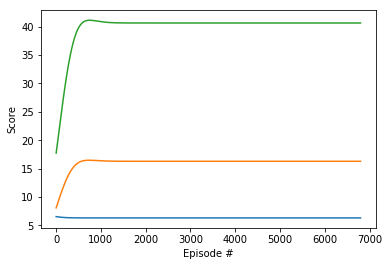

23.214292526245117


In [5]:
import time
start_time = time.time()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device="cpu"
num_nodes = 640
net = Net(8,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,1).to(torch.device(device))  
net.train()
X_train = X_train.float().to(device)
y_train = y_train.float().to(device)
X_test = X_test.float().to(device)
y_test = y_test.float().to(device)
X_validate = X_validate.float().to(device)
y_validate = y_validate.float().to(device)


try:
    net.load_state_dict(torch.load('yearly_model_all.pth'))   
except:
    print("can't load model")
# learning_rate = 0.0000001
learning_rate = 0.00001
# learning_rate = 0.00000000001
opt = optim.Adam(params=net.parameters(),lr=learning_rate)

loss_train_arr = []
loss_test_arr = []
loss_validate_arr = []


prev_loss = 100000000
curr_loss = 999
epoch = 0

# for epoch in range(25000000):
while prev_loss >= curr_loss:
    
    #do the forward propagation
    out_train = net(X_train)
    out_test = net(X_test)
    out_validate = net(X_validate)

    # Out loss function
    loss_train = F.mse_loss(out_train.view(1, -1), y_train.float().view(1, -1))
    loss_train_arr.append(loss_train.data)
    loss_test = F.mse_loss(out_test.view(1, -1), y_test.float().view(1, -1)).data
    loss_test_arr.append(loss_test)
    loss_validate = F.mse_loss(out_validate.view(1, -1), y_validate.float().view(1, -1)).data
    loss_validate_arr.append(loss_validate)
#     prev_loss = curr_loss
#     curr_loss = loss_test

    epoch = epoch + 1
    if epoch % 1000 == 0:
        print(epoch, loss_test,loss_train,loss_validate)
        torch.save(net.state_dict(),'yearly_model_all.pth')
        prev_loss = curr_loss
#         curr_loss = loss_test
        curr_loss = loss_train + loss_test + loss_validate
    # Our optimizer
    
    #optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)

    #do back propagation
    opt.zero_grad()
    loss_train.backward()
    
#     torch.nn.utils.clip_grad_norm_(net.parameters(), 0.1)
#     torch.nn.utils.clip_grad_norm_(net.parameters(), 0.01)     

    opt.step()

torch.save(net.state_dict(),'yearly_model_all.pth')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(loss_train_arr[200:])), loss_train_arr[200:],label="train")
plt.plot(np.arange(len(loss_test_arr[200:])), loss_test_arr[200:],label="test")
plt.plot(np.arange(len(loss_validate_arr[200:])), loss_validate_arr[200:],label="validate")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
print(time.time() - start_time)

# Use it!

,month,% FULL,Brent (eur/bbl),JKM (Eur/mmbtu),Coal (eur/t),CO2 (eur/t),Endex (eur/Mwh),AVG_TEMP,current TTF_forward
0,11,97.228542,51.821568,5.896248,60.40,24.20,48.58,8.689189,16.008
1,12,86.241895,51.421822,6.373217,61.55,23.25,52.30,6.783654,17.633
2,1,73.003347,50.761467,6.366586,62.35,23.25,52.13,4.069565,18.083
3,2,56.839095,50.169794,6.000894,62.85,23.25,48.20,4.152381,18.113
4,3,46.037339,49.641053,5.362049,63.20,23.16,47.75,5.921296,17.813
5,4,44.888083,48.760908,5.170157,63.55,23.16,45.92,8.418750,17.015
6,5,52.612540,47.927773,4.922614,63.75,23.16,43.34,12.776087,16.415
7,6,63.062625,47.209026,4.920258,64.40,24.30,44.46,14.939560,16.165
8,7,73.733710,47.132677,5.068714,65.15,24.30,43.77,18.146067,15.695
9,8,84.940202,47.047845,5.217170,65.85,24.30,47.05,17.863636,16.215


,month,% FULL,Brent (eur/bbl),JKM (Eur/mmbtu),Coal (eur/t),CO2 (eur/t),Endex (eur/Mwh),AVG_TEMP,current TTF_forward,predicted TTF,market premium
0,11,97.228542,51.821568,5.896248,60.40,24.20,48.58,8.689189,16.008,20.015751,-4.007751
1,12,86.241895,51.421822,6.373217,61.55,23.25,52.30,6.783654,17.633,21.561325,-3.928325
2,1,73.003347,50.761467,6.366586,62.35,23.25,52.13,4.069565,18.083,19.426516,-1.343516
3,2,56.839095,50.169794,6.000894,62.85,23.25,48.20,4.152381,18.113,18.765438,-0.652438
4,3,46.037339,49.641053,5.362049,63.20,23.16,47.75,5.921296,17.813,18.372257,-0.559257
5,4,44.888083,48.760908,5.170157,63.55,23.16,45.92,8.418750,17.015,17.832073,-0.817073
6,5,52.612540,47.927773,4.922614,63.75,23.16,43.34,12.776087,16.415,16.836374,-0.421374
7,6,63.062625,47.209026,4.920258,64.40,24.30,44.46,14.939560,16.165,17.019106,-0.854106
8,7,73.733710,47.132677,5.068714,65.15,24.30,43.77,18.146067,15.695,16.768194,-1.073194
9,8,84.940202,47.047845,5.217170,65.85,24.30,47.05,17.863636,16.215,17.812832,-1.597832


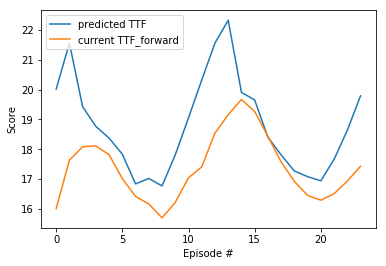

In [7]:
cases = pd.read_csv('Cases.csv',sep=",")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
display(cases)
num_nodes = 640

net = Net(8,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,1).to(torch.device(device))  

net.load_state_dict(torch.load('yearly_model_all.pth'))
net.eval()

TTF_pred = []
market_premium = []


for i in range(0,cases.shape[0]):    
    columns = ['% FULL','Brent (eur/bbl)','Coal (eur/t)','CO2 (eur/t)','month','JKM (Eur/mmbtu)','Endex (eur/Mwh)','AVG_TEMP']
#     columns = ['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)','AVG_TEMP']
#     columns = ['% FULL','Brent (eur/bbl)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)']
    X_use = pd.DataFrame(columns=columns)    
    X_use['month'] = [cases["month"].iloc[i]]
    X_use["% FULL"] = [cases["% FULL"].iloc[i]]
    X_use['Brent (eur/bbl)'] = [cases['Brent (eur/bbl)'].iloc[i]]
    X_use['Coal (eur/t)'] = [cases['Coal (eur/t)'].iloc[i]]
    X_use['CO2 (eur/t)'] = [cases['CO2 (eur/t)'].iloc[i]]
    X_use['JKM (Eur/mmbtu)'] = [cases['JKM (Eur/mmbtu)'].iloc[i]]
    X_use['Endex (eur/Mwh)'] = [cases['Endex (eur/Mwh)'].iloc[i]]
    X_use['AVG_TEMP'] = [cases['AVG_TEMP'].iloc[i]]

    X_use[columns] = scaler.transform(X_use[columns])
#     X_use['% FULL']=scaler1.transform(X_use['% FULL'].values.reshape(-1, 1))
#     X_use['Brent (eur/bbl)']=scaler2.transform(X_use['Brent (eur/bbl)'].values.reshape(-1, 1))
#     X_use['Coal (eur/t)']=scaler3.transform(X_use['Coal (eur/t)'].values.reshape(-1, 1))
#     X_use['CO2 (eur/t)']=scaler4.transform(X_use['CO2 (eur/t)'].values.reshape(-1, 1))
#     X_use['month'] = scaler5.transform(X_use['month'].values.reshape(-1, 1))
#     X_use['JKM (Eur/mmbtu)'] = scaler6.transform(X_use['JKM (Eur/mmbtu)'].values.reshape(-1, 1))
#     X_use['Endex (eur/Mwh)'] = scaler7.transform(X_use['Endex (eur/Mwh)'].values.reshape(-1, 1))
#     X_use['AVG_TEMP'] = scaler8.transform(X_use['AVG_TEMP'].values.reshape(-1, 1))

    X_use= torch.Tensor(X_use.astype(np.float32).values)
    X_use = X_use.float().to(device) 
    out = net(X_use).data
    out = out.cpu().data.numpy()
    TTF_pred.append(out[0][0])
    market_premium.append(cases["current TTF_forward"].iloc[i] - out[0][0])
    #print("predicted price: ",out[0][0])
    
cases["predicted TTF"] = TTF_pred
cases["market premium"] = market_premium
display(cases)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(cases["predicted TTF"])), cases["predicted TTF"],label='predicted TTF')
plt.plot(np.arange(len(cases["current TTF_forward"])), cases["current TTF_forward"],label='current TTF_forward')
plt.legend(loc='upper left')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()